# Demo notebook with timing

Notebook has been runned on a ubuntu desktop with a ryzen 5900X and python 3.11.8.
It uses a CRSP database from 1973 to end 2023, roughly 44,276,311 rows for 12 columns, or 850Mb in parquet format.

In [1]:
import numpy as np
import py_event_studies as pes
from IPython.display import display

In [2]:
%%time

pes.clear_cache() # If you want to clear the cache manually (not necessary, used here for demo and showing usefullness bellows)

Cache cleared successfully.
CPU times: user 0 ns, sys: 1.04 s, total: 1.04 s
Wall time: 1.04 s


In [3]:
%%time 
# First load is a bit long due to preprocessing
pes.load_data('../.data/CRSPAllClean.parquet')
pes.load_ff_factors('../.data/FF5.csv')


Loading and preprocessing data from ../.data/CRSPAllClean.parquet
Cached preprocessed data for ../.data/CRSPAllClean.parquet
Using cached data for ../.data/CRSPAllClean.parquet
CPU times: user 52.6 s, sys: 33.8 s, total: 1min 26s
Wall time: 1min 17s


In [4]:
%%time 
# While second use caching mechanism and is much faster (using files, not RAM, so will works over multiple sessions)
pes.load_data('../.data/CRSPAllClean.parquet')
pes.load_ff_factors('../.data/FF5.csv')


Using cached data for ../.data/CRSPAllClean.parquet
CPU times: user 813 ms, sys: 6.9 s, total: 7.71 s
Wall time: 7.71 s


In [5]:
%%time 
# The first time the function is launched it requires compilation of some of the backend functions that will take a much longer time than after it
event_date = '20120816'
valid_permnos = pes.get_valid_permno_at_date(event_date)

results = pes.compute(event_date, valid_permnos[np.array([1,10,50,23,35, 102, 55, 66, 548,1002])])
print(results)

Event Study Results
Event Date: 20120816
Portfolio: [10026 10421 12374 11370 12009]...
Number of stocks: 10
Estimation period: 249 days
Event period: 10 days
Number of cluster configurations: 9
Number of models: 10
Available tests: std, CS, BMP, KP
CPU times: user 1min 47s, sys: 3.8 s, total: 1min 51s
Wall time: 1min 56s


In [6]:
%%time 
# As soon as it's the second or more run on the function on your machine time become much more reasonable
event_date = '20120816'
valid_permnos = pes.get_valid_permno_at_date(event_date)

results = pes.compute(event_date, valid_permnos[np.array([1,10,50,23,35, 102, 55, 66, 548,1002])])
print(results)

Event Study Results
Event Date: 20120816
Portfolio: [10026 10421 12374 11370 12009]...
Number of stocks: 10
Estimation period: 249 days
Event period: 10 days
Number of cluster configurations: 9
Number of models: 10
Available tests: std, CS, BMP, KP
CPU times: user 374 ms, sys: 363 ms, total: 737 ms
Wall time: 4.71 s


In [7]:
# Get help on available methods and properties
results.help()

Available methods and properties:
- estim_preds: Predicted returns for estimation period
- event_preds: Predicted returns for event period
- std_test_stats, cs_test_stats, bmp_test_stats, kp_test_stats: Test statistics
- std_p_values, cs_p_values, bmp_p_values, kp_p_values: P-values for tests
- get_test_result(test_name): Get test statistics for a specific test
- get_p_values(test_name): Get p-values for a specific test
- summary(): Print a detailed summary of results
- plot(cluster_idx, model_idx): Plot true vs predicted returns for a specific model and cluster configuration
- to_excel(filename): Export results to an Excel file


In [8]:
# Access test statistics and p-values
display(results.std_test_stats)
display(results.std_p_values)

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,RidgeCV,LassoCV,ElasticNetCV
5,0.137401,0.296386,0.196623,0.197521,0.547672,0.447263,0.447232,24.277468,1.367425,3.158753
10,0.431667,0.517136,0.411452,0.417800,0.547672,0.447263,0.447232,-7.333817,0.531358,0.896399
15,0.428506,0.518150,0.415403,0.421101,0.547672,0.447263,0.447232,-1.289737,1.127491,2.313970
20,0.425415,0.547281,0.475222,0.476990,0.547672,0.447263,0.447232,-0.440856,-0.190083,-0.571555
25,0.266557,0.317625,0.222524,0.234459,0.547672,0.447263,0.447232,0.328671,1.045031,1.845354
30,0.439247,0.425165,0.310361,0.328355,0.547672,0.447263,0.447232,2.201971,1.441762,1.436759
35,0.371158,0.423967,0.340273,0.345668,0.547672,0.447263,0.447232,11.592221,1.558027,2.724205
40,0.162669,0.230948,0.146146,0.152712,0.547672,0.447263,0.447232,-3.505047,0.878326,0.582600
50,0.391051,0.464857,0.360696,0.386770,0.547672,0.447263,0.447232,1.902287,0.301799,0.873909


,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,RidgeCV,LassoCV,ElasticNetCV
5,0.989461,0.951634,0.977245,0.974651,0.849913,0.893216,0.887757,0.011799,0.426336,0.082289
10,0.902643,0.863127,0.906423,0.895859,0.849913,0.893216,0.887757,0.019894,0.857784,0.663165
15,0.903963,0.862647,0.904763,0.894384,0.849913,0.893216,0.887757,0.460883,0.539548,0.164594
20,0.905246,0.848632,0.878407,0.868501,0.849913,0.893216,0.887757,0.898767,0.979971,0.838161
25,0.961159,0.944755,0.971010,0.964652,0.849913,0.893216,0.887757,0.941808,0.582449,0.260909
30,0.899450,0.904210,0.944876,0.932968,0.849913,0.893216,0.887757,0.183021,0.395303,0.397329
35,0.926652,0.904709,0.934355,0.926254,0.849913,0.893216,0.887757,0.014305,0.350788,0.114685
40,0.985274,0.970205,0.987320,0.984691,0.849913,0.893216,0.887757,0.065525,0.673156,0.832640
50,0.919059,0.887113,0.926741,0.909381,0.849913,0.893216,0.887757,0.246216,0.950605,0.675600


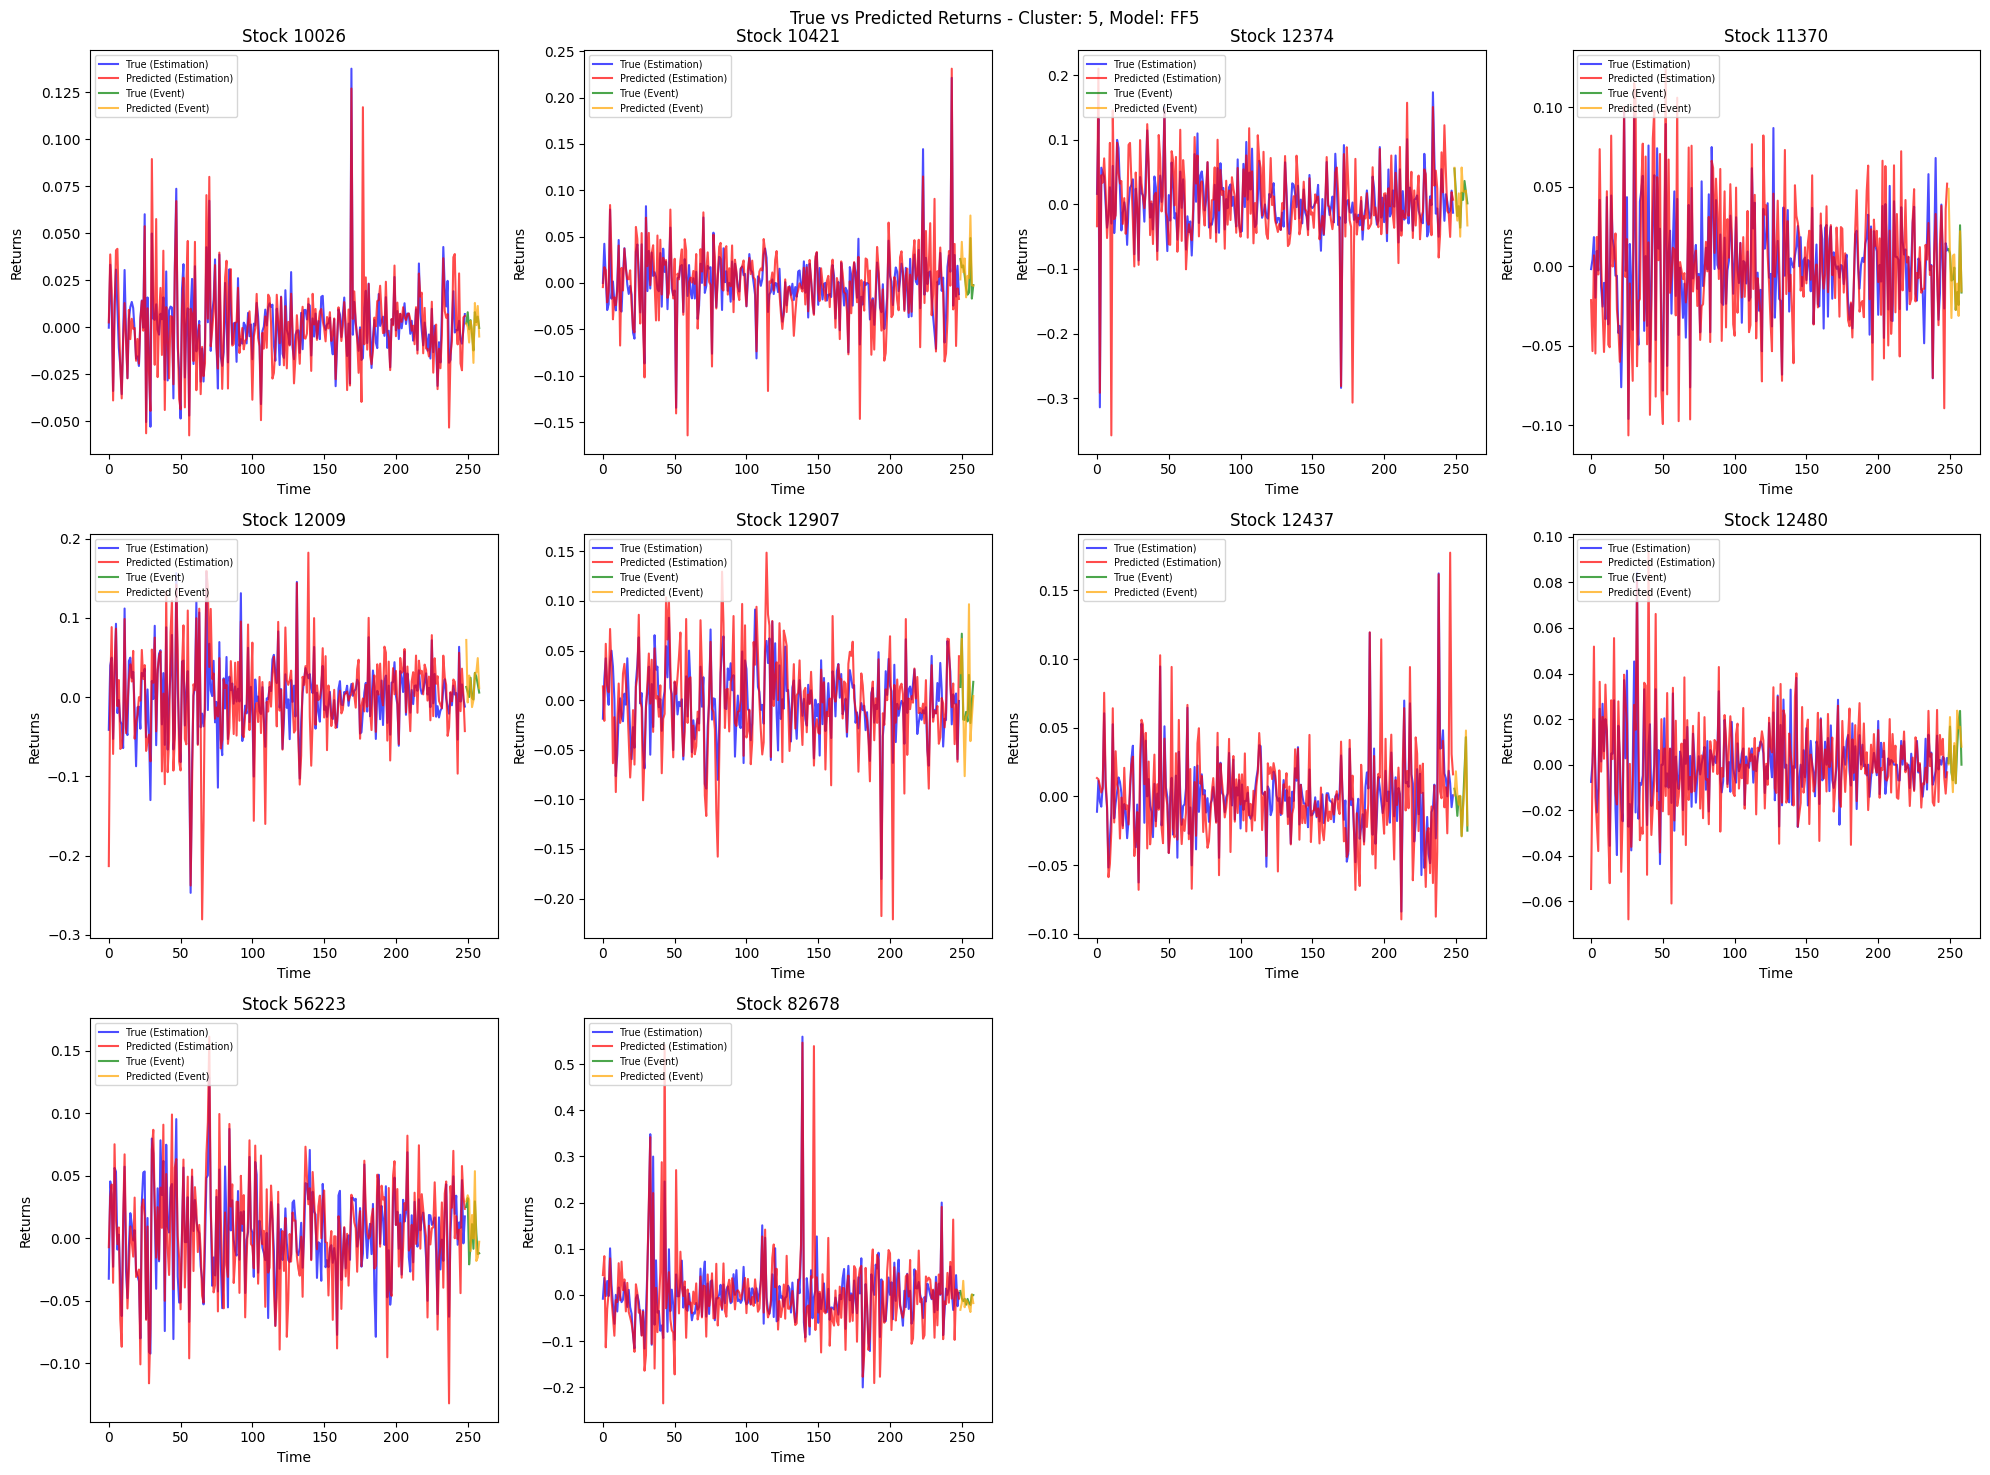

In [9]:
# Plot prediction with one method only for all stocks on whole period
results.plot(5, 'FF5')

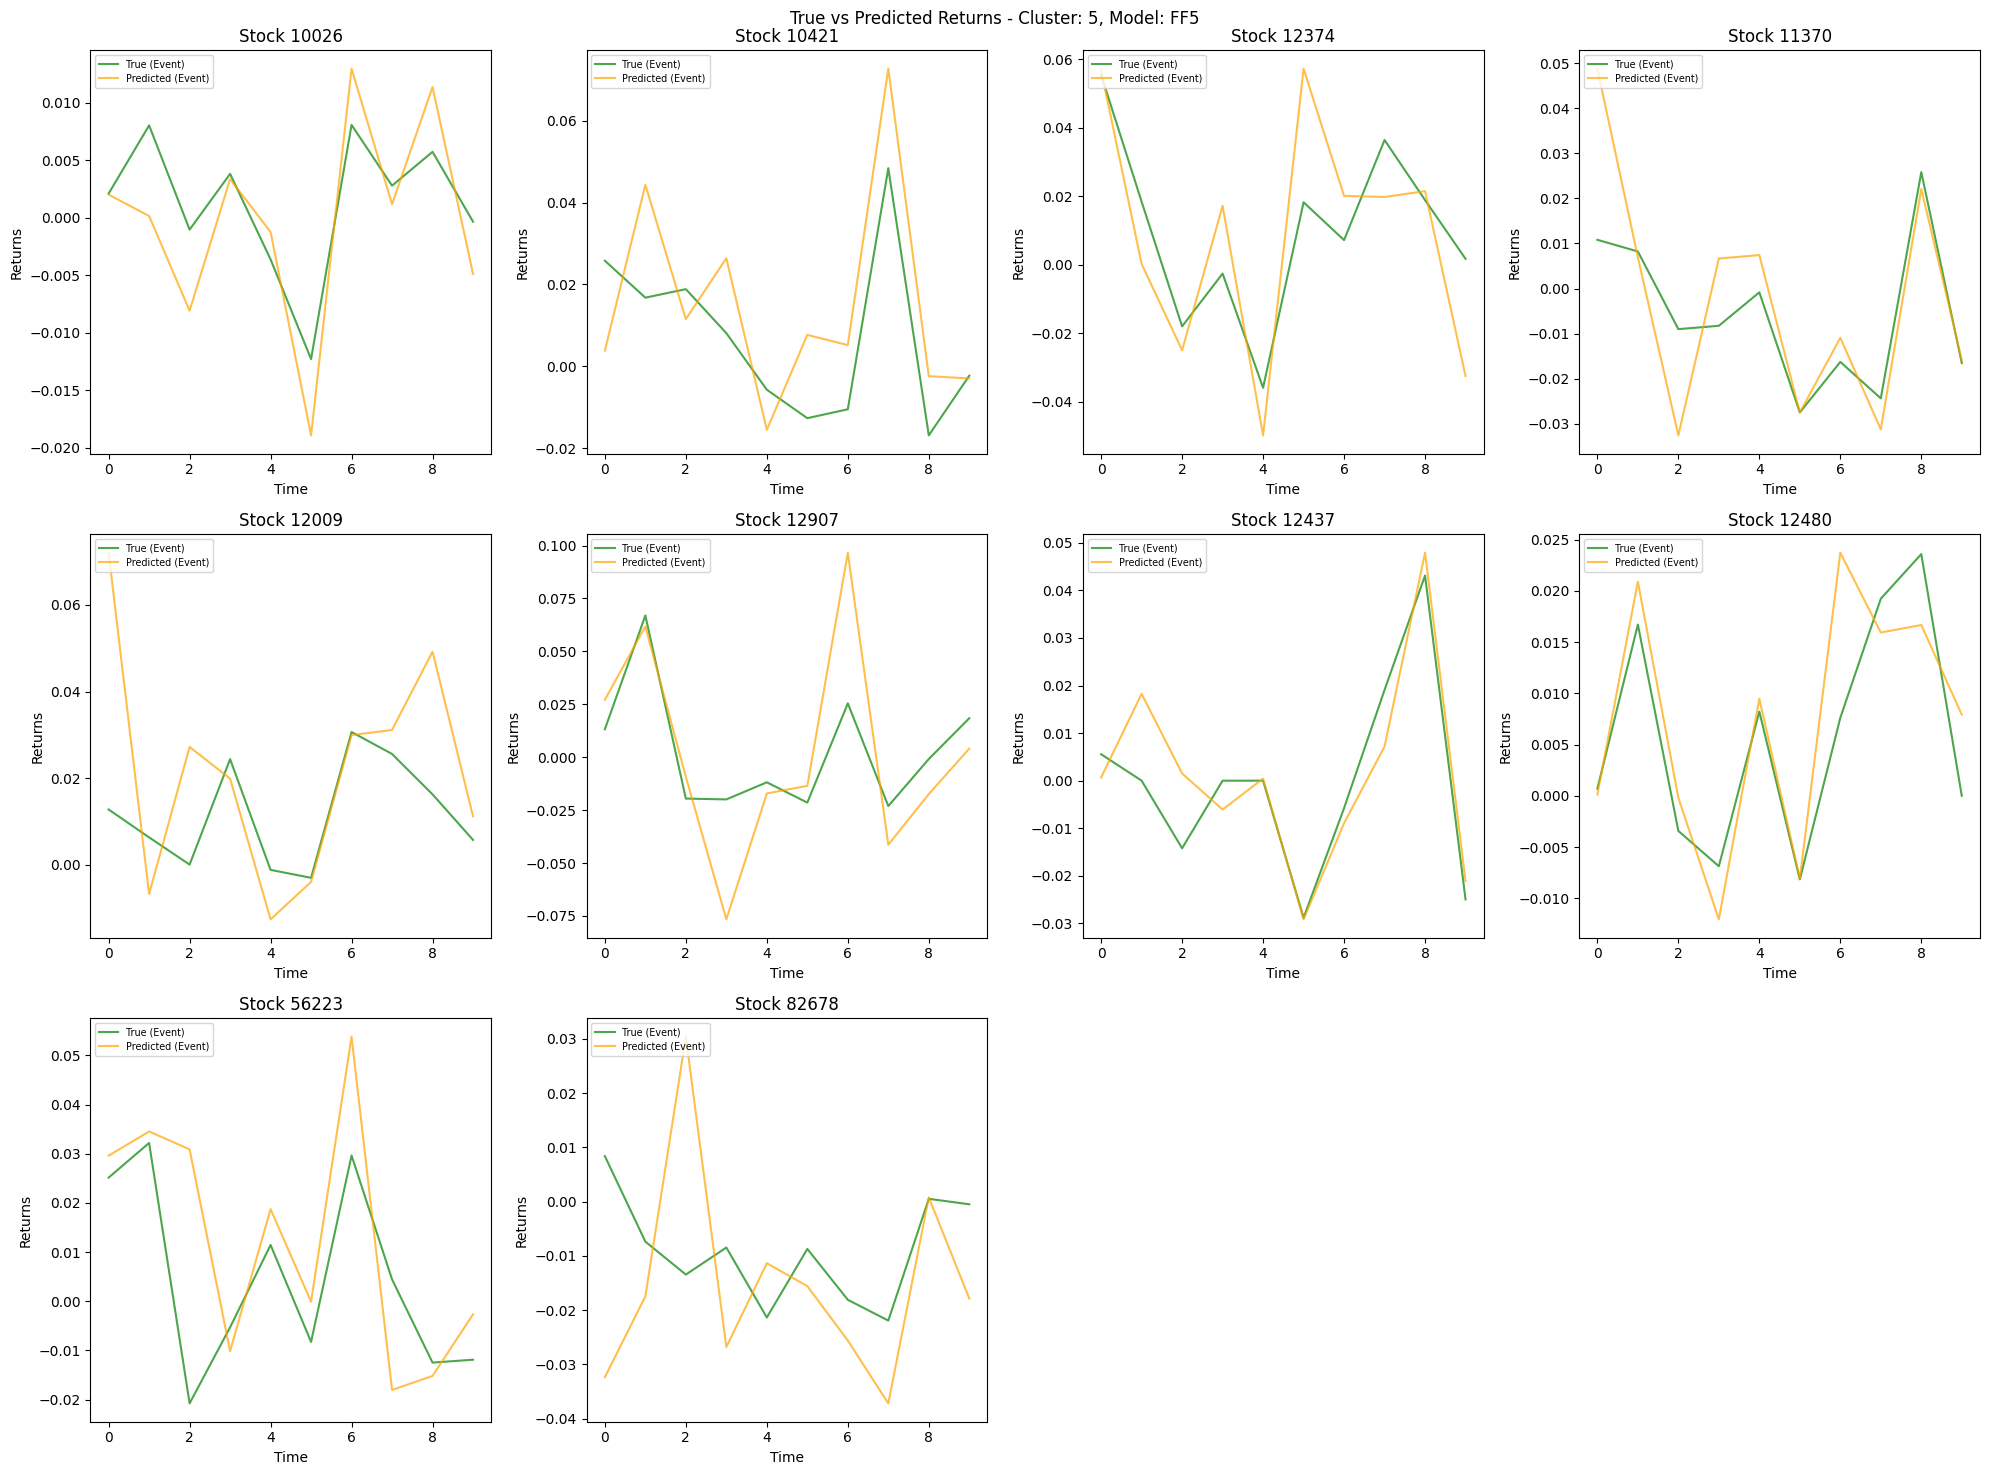

In [14]:
# Plot prediction with one method only for all stocks on whole period
results.plot(5, 'FF5', only_event=True)

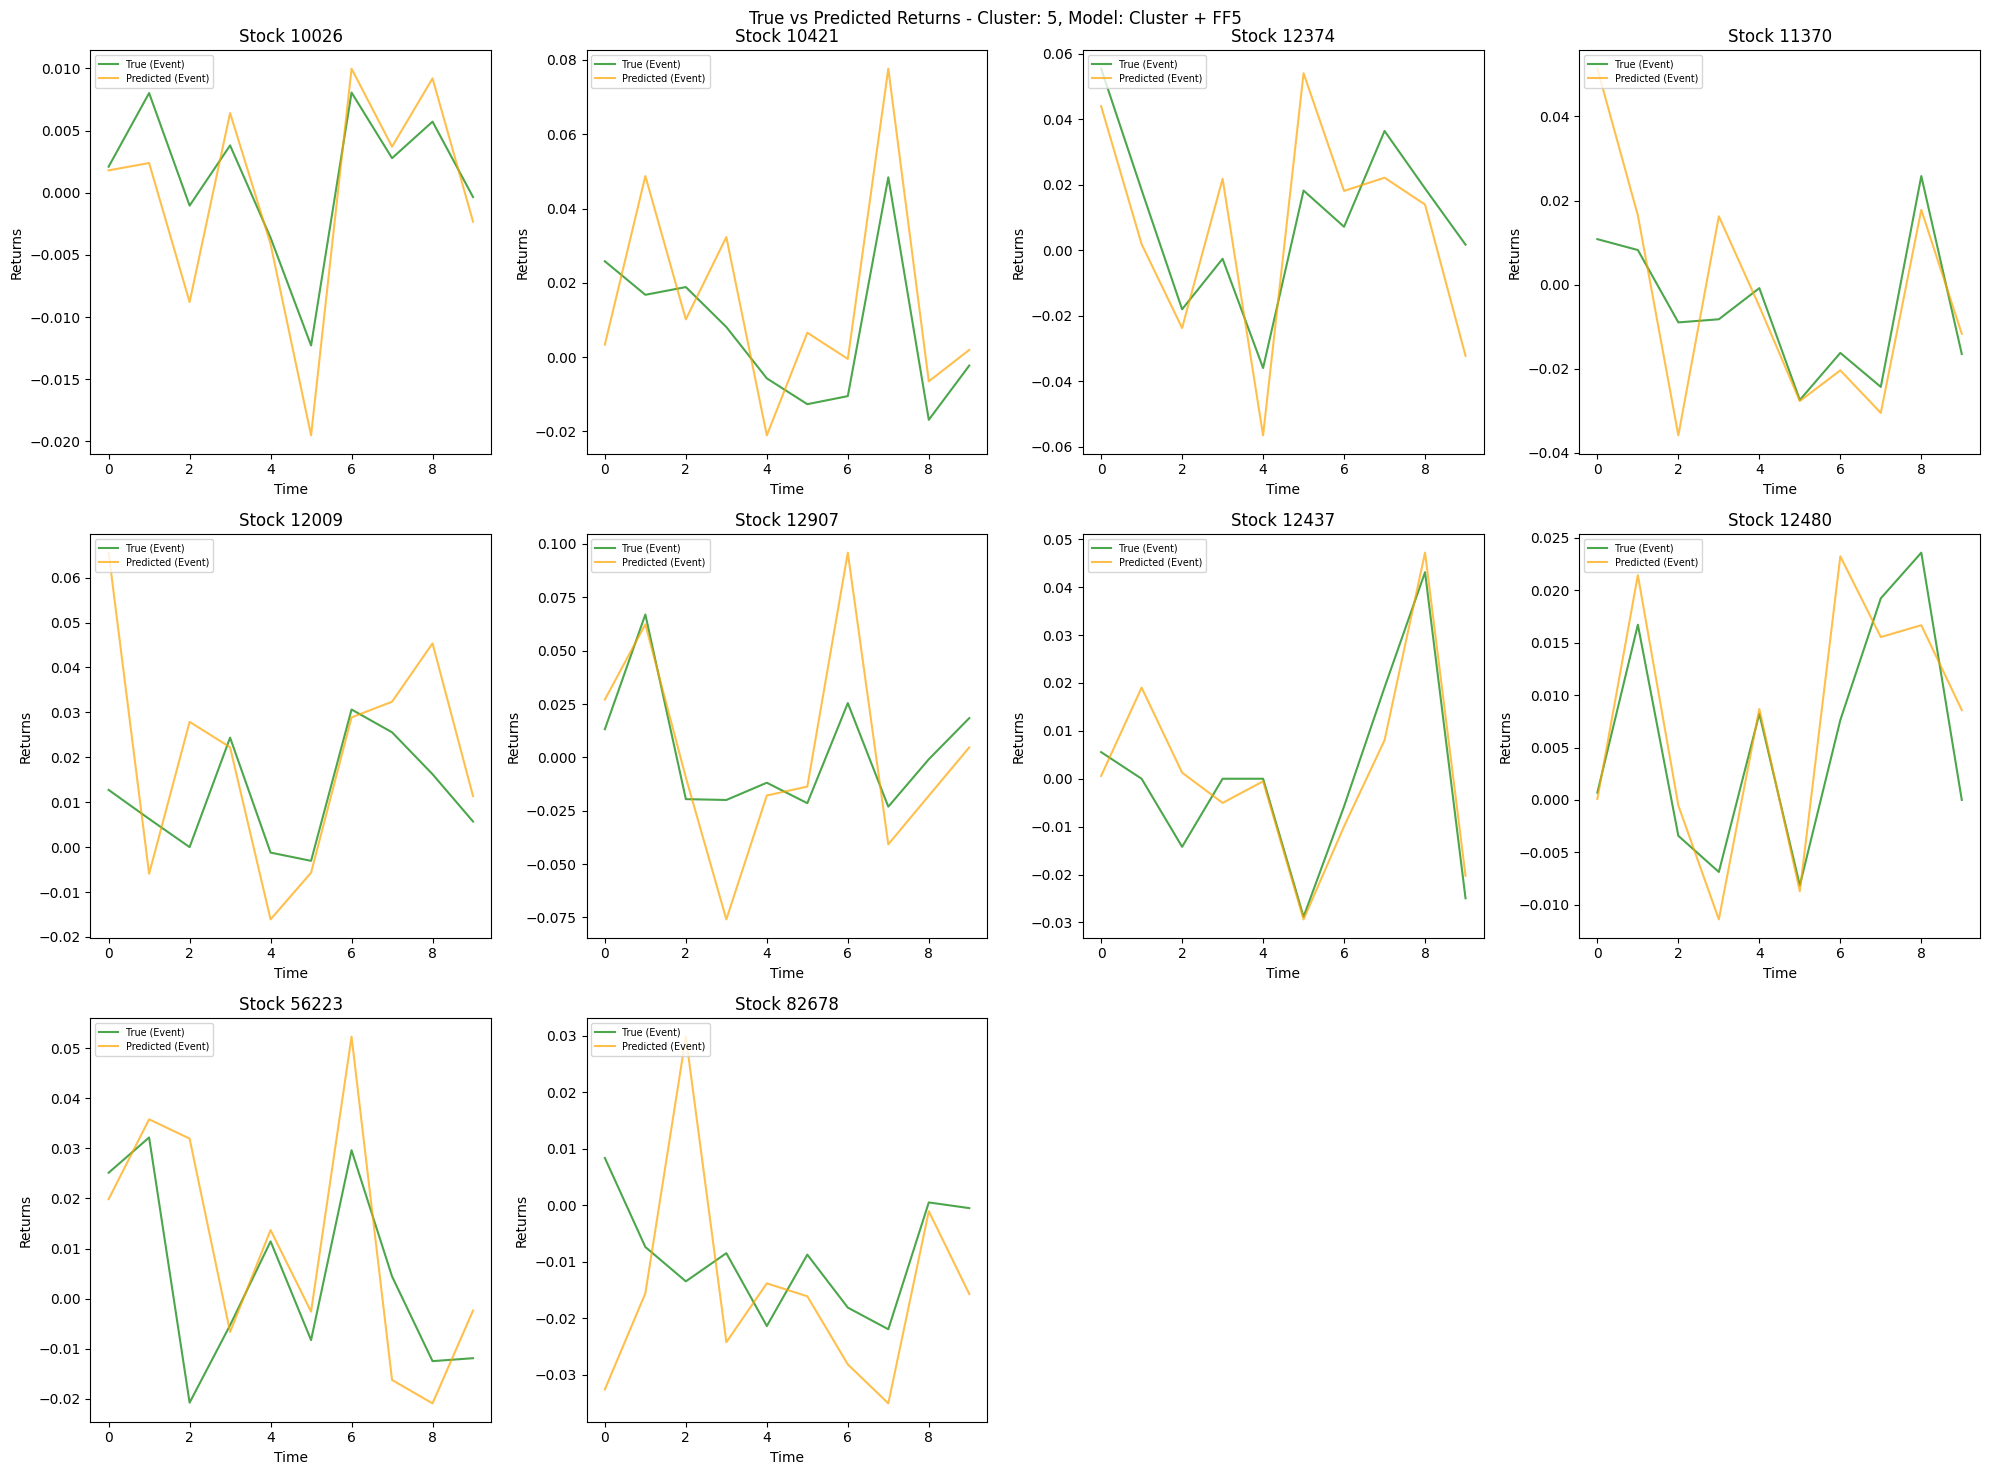

In [15]:
results.plot(5, 'Cluster + FF5', only_event=True)

In [12]:
# Display summary, 
results.summary()

'Event Date: 20120816'

'Portfolio: [10026 10421 12374 11370 12009 12907 12437 12480 56223 82678]'

'Number of stocks: 10'

'Estimation period: 249 days'

'Event period: 10 days'

'\nTest Results:'

'\nstd Test:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,RidgeCV,LassoCV,ElasticNetCV
5,0.137401,0.296386,0.196623,0.197521,0.547672,0.447263,0.447232,24.277468,1.367425,3.158753
10,0.431667,0.517136,0.411452,0.417800,0.547672,0.447263,0.447232,-7.333817,0.531358,0.896399
15,0.428506,0.518150,0.415403,0.421101,0.547672,0.447263,0.447232,-1.289737,1.127491,2.313970
20,0.425415,0.547281,0.475222,0.476990,0.547672,0.447263,0.447232,-0.440856,-0.190083,-0.571555
25,0.266557,0.317625,0.222524,0.234459,0.547672,0.447263,0.447232,0.328671,1.045031,1.845354
30,0.439247,0.425165,0.310361,0.328355,0.547672,0.447263,0.447232,2.201971,1.441762,1.436759
35,0.371158,0.423967,0.340273,0.345668,0.547672,0.447263,0.447232,11.592221,1.558027,2.724205
40,0.162669,0.230948,0.146146,0.152712,0.547672,0.447263,0.447232,-3.505047,0.878326,0.582600
50,0.391051,0.464857,0.360696,0.386770,0.547672,0.447263,0.447232,1.902287,0.301799,0.873909


'\nstd Test P-values:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,RidgeCV,LassoCV,ElasticNetCV
5,0.989461,0.951634,0.977245,0.974651,0.849913,0.893216,0.887757,0.011799,0.426336,0.082289
10,0.902643,0.863127,0.906423,0.895859,0.849913,0.893216,0.887757,0.019894,0.857784,0.663165
15,0.903963,0.862647,0.904763,0.894384,0.849913,0.893216,0.887757,0.460883,0.539548,0.164594
20,0.905246,0.848632,0.878407,0.868501,0.849913,0.893216,0.887757,0.898767,0.979971,0.838161
25,0.961159,0.944755,0.971010,0.964652,0.849913,0.893216,0.887757,0.941808,0.582449,0.260909
30,0.899450,0.904210,0.944876,0.932968,0.849913,0.893216,0.887757,0.183021,0.395303,0.397329
35,0.926652,0.904709,0.934355,0.926254,0.849913,0.893216,0.887757,0.014305,0.350788,0.114685
40,0.985274,0.970205,0.987320,0.984691,0.849913,0.893216,0.887757,0.065525,0.673156,0.832640
50,0.919059,0.887113,0.926741,0.909381,0.849913,0.893216,0.887757,0.246216,0.950605,0.675600


'\nCS Test:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,RidgeCV,LassoCV,ElasticNetCV
5,0.200698,0.402873,0.260862,0.255273,0.741683,0.595302,0.577932,0.719289,0.961344,1.446641
10,0.551348,0.663456,0.517415,0.511469,0.741683,0.595302,0.577932,-1.401960,0.561448,0.654251
15,0.546836,0.668557,0.526342,0.518735,0.741683,0.595302,0.577932,-0.325653,1.486116,2.304483
20,0.550425,0.713411,0.612976,0.597689,0.741683,0.595302,0.577932,-0.321560,-0.264627,-0.620846
25,0.325098,0.389962,0.270863,0.279165,0.741683,0.595302,0.577932,0.177324,0.867001,1.373375
30,0.548099,0.529367,0.380824,0.395432,0.741683,0.595302,0.577932,0.950267,1.402994,1.375497
35,0.470830,0.543522,0.429071,0.423276,0.741683,0.595302,0.577932,2.627881,0.951727,1.144577
40,0.249139,0.340395,0.205320,0.208877,0.741683,0.595302,0.577932,-1.277677,1.209975,0.666619
50,0.450410,0.547478,0.414318,0.438107,0.741683,0.595302,0.577932,0.747221,0.241775,0.586293


'\nCS Test P-values:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,RidgeCV,LassoCV,ElasticNetCV
5,0.977708,0.913342,0.960519,0.958372,0.748623,0.822674,0.824758,0.760829,0.627497,0.393336
10,0.848121,0.789270,0.858587,0.851793,0.748623,0.822674,0.824758,0.411670,0.843166,0.795689
15,0.850319,0.786564,0.854281,0.848212,0.748623,0.822674,0.824758,0.942827,0.377743,0.166061
20,0.848572,0.762525,0.810839,0.808307,0.748623,0.822674,0.824758,0.944197,0.961704,0.813142
25,0.943013,0.918467,0.957544,0.950621,0.748623,0.822674,0.824758,0.982536,0.679424,0.423778
30,0.849705,0.857300,0.918914,0.905670,0.748623,0.822674,0.824758,0.633546,0.411237,0.422869
35,0.885739,0.850463,0.898941,0.893409,0.748623,0.822674,0.824758,0.124329,0.632748,0.530883
40,0.965948,0.936943,0.975230,0.971738,0.748623,0.822674,0.824758,0.466435,0.498512,0.789141
50,0.894678,0.848536,0.905220,0.886686,0.748623,0.822674,0.824758,0.745592,0.967884,0.830782


'\nBMP Test:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,RidgeCV,LassoCV,ElasticNetCV
5,0.447186,0.668273,0.503822,0.515036,0.985899,0.811054,0.815369,1.915530,0.851458,1.220770
10,0.726860,0.935386,0.756029,0.766718,0.985899,0.811054,0.815369,0.254552,0.750508,0.845876
15,0.703323,0.922291,0.745087,0.756126,0.985899,0.811054,0.815369,0.954985,1.519970,2.133167
20,0.723561,0.974030,0.835103,0.839540,0.985899,0.811054,0.815369,0.253062,0.061821,-0.546089
25,0.530274,0.657568,0.496029,0.515635,0.985899,0.811054,0.815369,0.799631,0.910149,1.541260
30,0.865281,0.883537,0.712482,0.734316,0.985899,0.811054,0.815369,-0.213983,1.465680,1.140110
35,0.639776,0.776112,0.657439,0.671514,0.985899,0.811054,0.815369,2.864006,0.910841,1.139648
40,0.624678,0.746717,0.590249,0.605291,0.985899,0.811054,0.815369,-0.999668,0.876124,0.013890
50,0.863627,0.969466,0.802593,0.829483,0.985899,0.811054,0.815369,1.424811,1.159245,1.706390


'\nBMP Test P-values:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,RidgeCV,LassoCV,ElasticNetCV
5,0.896065,0.786715,0.865071,0.850037,0.614151,0.707648,0.700264,0.242933,0.688034,0.493297
10,0.756712,0.641196,0.735088,0.720584,0.614151,0.707648,0.700264,0.964491,0.743791,0.691128
15,0.769477,0.648299,0.740962,0.726047,0.614151,0.707648,0.700264,0.630967,0.364821,0.195623
20,0.758507,0.620378,0.692658,0.683525,0.614151,0.707648,0.700264,0.964894,0.997854,0.850682
25,0.858302,0.792384,0.868747,0.849742,0.614151,0.707648,0.700264,0.716735,0.655578,0.356907
30,0.680377,0.669434,0.758429,0.737336,0.614151,0.707648,0.700264,0.974716,0.385745,0.533140
35,0.803296,0.728383,0.787650,0.770020,0.614151,0.707648,0.700264,0.102476,0.655197,0.533374
40,0.811159,0.744447,0.822489,0.804392,0.614151,0.707648,0.700264,0.606710,0.674374,0.999891
50,0.681293,0.622824,0.710076,0.688582,0.614151,0.707648,0.700264,0.402203,0.523510,0.300950


'\nKP Test:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,RidgeCV,LassoCV,ElasticNetCV
5,0.414712,0.619356,0.466166,0.475479,0.82395,0.677568,0.679105,1.909470,0.777438,1.121685
10,0.692373,0.881217,0.712361,0.720669,0.82395,0.677568,0.679105,0.256901,0.703355,0.784725
15,0.670654,0.871916,0.704458,0.713333,0.82395,0.677568,0.679105,0.922084,1.401304,1.991003
20,0.697781,0.922230,0.789642,0.791742,0.82395,0.677568,0.679105,0.246843,0.057071,-0.510845
25,0.507381,0.625682,0.472993,0.490516,0.82395,0.677568,0.679105,0.778791,0.814530,1.384992
30,0.816228,0.829228,0.667553,0.686239,0.82395,0.677568,0.679105,-0.207020,1.352038,1.063139
35,0.620272,0.739892,0.625225,0.637229,0.82395,0.677568,0.679105,2.733272,0.825875,1.036062
40,0.594380,0.707599,0.558300,0.571142,0.82395,0.677568,0.679105,-0.954943,0.810034,0.013026
50,0.821107,0.913373,0.755185,0.777661,0.82395,0.677568,0.679105,1.287021,1.043362,1.546106


'\nKP Test P-values:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,RidgeCV,LassoCV,ElasticNetCV
5,0.909640,0.812359,0.882536,0.869221,0.703276,0.779757,0.772254,0.244429,0.728988,0.542512
10,0.775376,0.670703,0.758494,0.744422,0.703276,0.779757,0.772254,0.963849,0.769459,0.724969
15,0.786996,0.675797,0.762714,0.748237,0.703276,0.779757,0.772254,0.649006,0.411944,0.225148
20,0.772466,0.648332,0.717030,0.707743,0.703276,0.779757,0.772254,0.966557,0.998170,0.867488
25,0.869104,0.809083,0.879427,0.862005,0.703276,0.779757,0.772254,0.728241,0.708492,0.418822
30,0.707552,0.699227,0.782316,0.762347,0.703276,0.779757,0.772254,0.976306,0.433008,0.572885
35,0.813439,0.748164,0.804498,0.787860,0.703276,0.779757,0.772254,0.113832,0.702209,0.587212
40,0.826695,0.765663,0.838580,0.821896,0.703276,0.779757,0.772254,0.630991,0.710981,0.999905
50,0.704851,0.653149,0.735541,0.714957,0.703276,0.779757,0.772254,0.462129,0.583334,0.355128


In [13]:
results.to_excel('../.data/event_study_results.xlsx')

/home/remi/.pyenv/versions/3.11.8/lib/python3.11/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
